<a href="https://colab.research.google.com/github/brijesh8nov/machine-learning/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Theory
Steps
1. Load the data (X,Y)
2. Instantiate the model
3. Train ("fit") the model
4. Evaluate the Model

**a = w1x1 + w2x2 + b = 0**

if a >= 0 -> predict 1

if a < 0 -> predict 0

Use SIGMOID function

In Tensoflow, this is written as `tf.keras.layers.Dense(output_size)`

In [0]:
# https://scikit-learn.org/stable/datasets/index.html
from sklearn.datasets import load_breast_cancer

In [0]:
data = load_breast_cancer()

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
#the data is of BUNCH object, which is basically like a dictionary with keys
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
#print the data
data.data.shape

(569, 30)

In [6]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
#length of y = x = 569
data.target.shape

(569,)

In [9]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
#split the data set for testing, 33%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [0]:
#SCALE the data (nornalize )
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
#Tensforflow, build model
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

#Evaluate the model
print("Train Score:", model.evaluate(X_train, y_train))
print("Test Score:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 0s 15ms/step - loss: 0.4479 - accuracy: 0.8215 - val_loss: 0.4426 - val_accuracy: 0.8085
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4058 - accuracy: 0.8504 - val_loss: 0.3996 - val_accuracy: 0.8404
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3696 - accuracy: 0.8583 - val_loss: 0.3628 - val_accuracy: 0.8670
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3394 - accuracy: 0.8714 - val_loss: 0.3317 - val_accuracy: 0.8883
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3142 - accuracy: 0.8871 - val_loss: 0.3058 - val_accuracy: 0.9096
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2917 - accuracy: 0.8950 - val_loss: 0.2838 - val_accuracy: 0.9309
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2743 - accuracy: 0.9029 - val_loss: 0.2645 - val_accuracy: 0.9309
Epoch 8/100


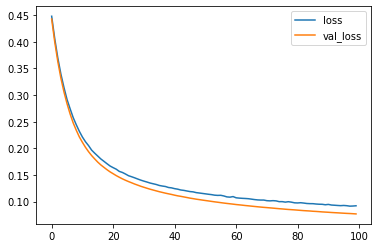

In [14]:
#plot the loss function
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()